In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import pickle

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Found 463 images belonging to 3 classes.


Found 110 images belonging to 3 classes.


In [32]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'VGG16modelsave.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

Epoch 1/75


c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4448 - loss: 5.8875
Epoch 1: val_accuracy improved from -inf to 0.47273, saving model to v2VGG16modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4465 - loss: 5.8315 - val_accuracy: 0.4727 - val_loss: 2.3322
Epoch 2/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5970 - loss: 1.4734
Epoch 2: val_accuracy improved from 0.47273 to 0.73636, saving model to v2VGG16modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5976 - loss: 1.4668 - val_accuracy: 0.7364 - val_loss: 0.9746
Epoch 3/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6294 - loss: 1.3096
Epoch 3: val_accuracy improved from 0.73636 to 0.81818, saving model to v2VGG16modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6298 - loss: 1.2965 - val_accuracy: 0.8182 - val_loss: 0.5042
Epoch 4/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7043 - loss: 0.6876
Epoch 4: val_accuracy did not improve from 0.81818
1

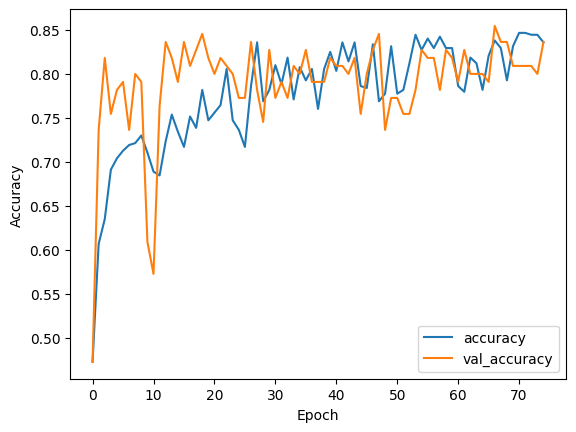

In [33]:
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=[Model_Checkpoint],
    batch_size=64)

with open('VGG16training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

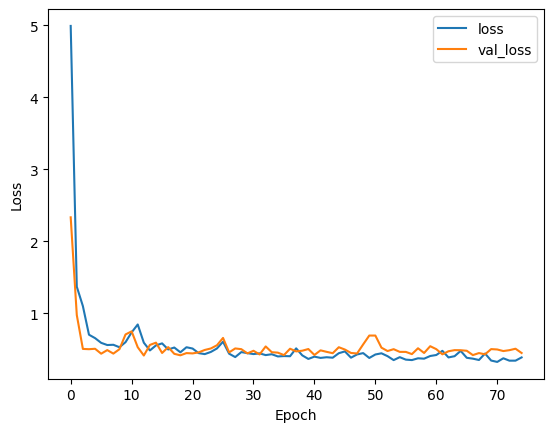

In [38]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.


c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8381 - loss: 0.4384
Test accuracy: 87.14%
Test loss: 0.3568


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

2/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022C325B6E80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


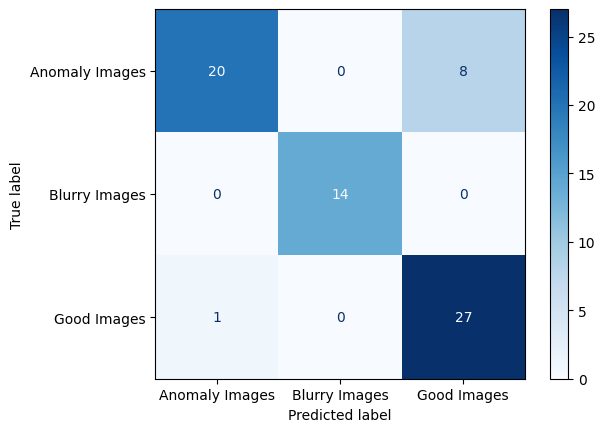

In [37]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()